# MLE Problem Set

# Problem 1

Problem 1 a)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.ma as ma
import scipy.stats as stats
import scipy.optimize as opt
import scipy.special as spl
from scipy.special import beta
import scipy.integrate as intgr
import math
import pandas as pd

Summary Statistics
mean:  720.2779753272437 median:  172.21 maximum:  227967.25 
 minimum:  0.01 Std. Dev.:  3972.663756393663


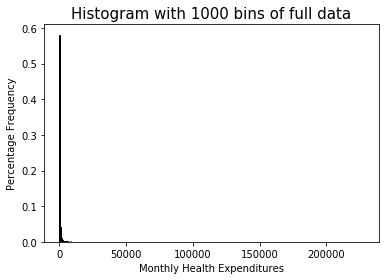

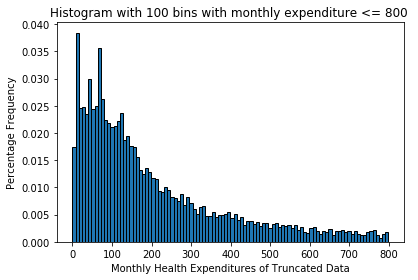

The sum of heights of bins of the truncated distribution is:  0.8494208494208465
The second histogram is a much better visualisation of the distribution of data as very few observations lie outside the limit of 800.


In [10]:
data = np.loadtxt('clms.txt')
data_mean = np.mean(data)
data_median = np.median(data)
data_maximum = np.max(data)
data_minimum = np.min(data)
data_std = np.std(data)
print('Summary Statistics')
print('mean: ', data_mean, 'median: ', data_median, 'maximum: ', data_maximum, '\n minimum: ', data_minimum, 'Std. Dev.: ', data_std)

weights = (1/int(len(data)))*np.ones(len(data))
n1, bin_cuts1, patches1 = plt.hist(data, 1000, edgecolor='k', weights= weights)
plt.title('Histogram with 1000 bins of full data', fontsize =15)
plt.xlabel('Monthly Health Expenditures')
plt.ylabel('Percentage Frequency')
plt.show()

#Masking the data so that values more than 800 are masked off
data_trunc = ma.masked_greater(data,800)
weights2 = (1/int(len(data_trunc)))*np.ones(len(data_trunc))
n2, bin_cuts2, patches2 = plt.hist(data_trunc, 100, edgecolor='k', weights=weights2)
plt.title('Histogram with 100 bins with monthly expenditure <= 800 ')
plt.xlabel('Monthly Health Expenditures of Truncated Data')
plt.ylabel('Percentage Frequency')
plt.tight_layout()
plt.show()
print('The sum of heights of bins of the truncated distribution is: ', n2.sum())
print('The second histogram is a much better visualisation of the distribution of data as very few observations lie outside the limit of 800.')


Problem 1 b)

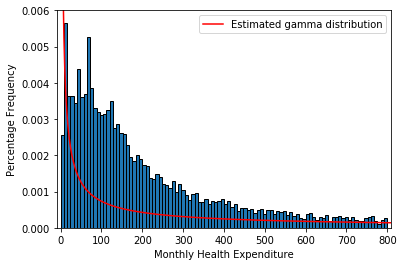

In [14]:
#MLE Estimator- Gamma Distribution

def trunc_gamma_pdf(xvals, alpha, beta):        
    pdf_vals = ((xvals)**(alpha-1))*(np.exp(-(xvals/beta)))/((beta**alpha)*math.gamma(alpha))
    pdf_vals = np.ravel(pdf_vals)
    return pdf_vals

def log_lik_gamma(xvals, alpha, beta):
    pdf_vals = trunc_gamma_pdf(xvals, alpha, beta)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    return log_lik_val

def crit(params, *args):
    alpha, beta = params
    xvals = args
    log_lik_val = log_lik_gamma(xvals, alpha, beta)
    neg_log_lik_val = -log_lik_val
    return neg_log_lik_val

def GA(data):
    mean = np.mean(data)
    var = np.var(data)
    beta_init = var / mean
    alpha_init = mean / beta_init
    params_init = np.array([alpha_init, beta_init])
    mle_args = data
    results_uncstr = opt.minimize(crit, params_init, args=(mle_args), method= "L-BFGS-B", bounds = ((1e-5,None),((1e-5,None))))
    alpha_MLE, beta_MLE = results_uncstr.x
    log_likelihood = results_uncstr.fun
    return alpha_MLE, beta_MLE, log_likelihood

alpha_MLE, beta_MLE, log_likelihood= GA(data)
x_dom= np.linspace(1,len(data), len(data))
pdf = trunc_gamma_pdf(x_dom, alpha_MLE, beta_MLE)
plt.plot(x_dom, pdf, 'r', label='Estimated gamma distribution')
plt.legend()
data_trunc = ma.masked_greater(data,800)
n2, bin_cuts2, patches2 = plt.hist(data_trunc, 100, edgecolor='k', density=True)
plt.xlim(-10,810)
plt.ylim(0,.006)
plt.xlabel('Monthly Health Expenditure')
plt.ylabel('Percentage Frequency')
plt.show()




Problem 1 c)

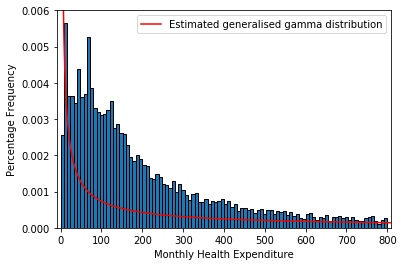

In [13]:
#Generalised Gamma Distribution

alpha_init= 0.2217553188239722
beta_init= 21911.06469927622

def trunc_gen_gamma_pdf(xvals, alpha, beta, m):        
    pdf_vals = m*((xvals)**(alpha-1))*(np.exp(-((xvals/beta)**m)))/((beta**alpha)*math.gamma(alpha/m))
    pdf_vals = np.ravel(pdf_vals)
    return pdf_vals

def log_lik_gamma_gen(xvals, alpha, beta, m):
    pdf_vals = trunc_gen_gamma_pdf(xvals, alpha, beta, m)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    return log_lik_val

def crit_gamma(params, *args):
    alpha, beta, m = params
    xvals = args
    log_lik_val = log_lik_gamma_gen(xvals, alpha, beta, m)
    neg_log_lik_val = -log_lik_val
    return neg_log_lik_val

def GG(data):
    params_init = np.array([alpha_init, beta_init, 1])
    mle_args = data
    results_uncstr = opt.minimize(crit_gamma, params_init, args=(mle_args),
                                  method = "L-BFGS-B", bounds = ((1e-10,None),(1e-10,None),(1e-10, None)))
    alpha_MLE, beta_MLE, m_MLE = results_uncstr.x
    log_likelihood = results_uncstr.fun
    return alpha_MLE, beta_MLE, m_MLE, log_likelihood

alpha_MLE, beta_MLE, m_MLE, log_likelihood = GG(data)
x_dom= np.linspace(1,len(data), len(data))
pdf = trunc_gen_gamma_pdf(x_dom, alpha_MLE, beta_MLE, m_MLE)
plt.plot(x_dom, pdf, 'r', label='Estimated generalised gamma distribution')
plt.legend()
data_trunc = ma.masked_greater(data,800)
n2, bin_cuts2, patches2 = plt.hist(data_trunc, 100,edgecolor='k', density=True)
plt.xlim(-10,810)
plt.ylim(0,.006)
plt.xlabel('Monthly Health Expenditure')
plt.ylabel('Percentage Frequency')
plt.show()

    
    

Problem 1 d)

0.10791985389156648 4450472.615452026 51.49635723806051 151.90294924338983 74877.83461711733


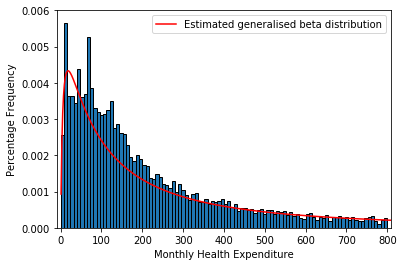

In [17]:
#2GB2 Distribution

#From previous estimation
alpha_init= 0.22173770055937686  
beta_init= 21911.064427545673 
m_init=  0.9970912437475302


#Setting initial parameters of 2GB2
q_init = 200
a_init = m_init
b_init = (q_init**(1/m_init))*beta_init
p_init = alpha_init/m_init


def gen_beta_pdf(xvals, a, b, p, q):        
    pdf_vals = a*(xvals**(a*p-1))/(b**(a*p)*beta(p,q)*(1+(xvals/b)**a)**(p+q))
    pdf_vals = np.ravel(pdf_vals)
    return pdf_vals

def log_lik_beta(xvals, a, b, p, q):
    pdf_vals = gen_beta_pdf(xvals, a, b, p, q)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    return log_lik_val

def crit_beta(params, *args):
    a, b, p, q = params
    xvals = args
    log_lik_val = log_lik_beta(xvals, a, b, p, q)
    neg_log_lik_val = -log_lik_val
    return neg_log_lik_val

def GB(data):
    params_init = np.array([a_init, b_init, p_init, q_init])
    mle_args = data
    results_uncstr = opt.minimize(crit_beta, params_init, args=(mle_args),
                                  method = "L-BFGS-B", bounds = ((1e-5,None),(1e-5,None),
                                                                 (1e-5, None),(1e-5, None)))
    a_MLE, b_MLE, p_MLE, q_MLE = results_uncstr.x
    log_likelihood = results_uncstr.fun
    return a_MLE, b_MLE, p_MLE, q_MLE, log_likelihood

a_MLE, b_MLE, p_MLE, q_MLE, log_likelihood= GB(data)
print(a_MLE, b_MLE, p_MLE, q_MLE, log_likelihood)
x_dom= np.linspace(1,len(data), len(data))
pdf = gen_beta_pdf(x_dom, a_MLE, b_MLE, p_MLE, q_MLE)
plt.plot(x_dom, pdf, 'r',label='Estimated generalised beta distribution')
plt.legend()
data_trunc = ma.masked_greater(data,800)
n2, bin_cuts2, patches2 = plt.hist(data_trunc, 100, edgecolor='k', density=True)
plt.xlim(-10,810)
plt.ylim(0,.006)
plt.xlabel('Monthly Health Expenditure')
plt.ylabel('Percentage Frequency')
plt.show()

Problem 1 e) 

In [20]:
alpha_MLE_b, beta_MLE_b, log_likelihood_b= GA(data)
alpha_MLE_c, beta_MLE_c, m_MLE_c, log_likelihood_c = GG(data)
a_MLE_d, b_MLE_d, p_MLE_d, q_MLE_d, log_likelihood_d= GB(data)

# Likelihood ratio test of part b) vs part d) 
log_lik_h0 = log_likelihood_d
log_lik_mle = log_likelihood_b
log_lik_mle2 = log_likelihood_c
LR_val = 2 * (log_lik_mle - log_lik_h0)
pval_h0 = 1.0 - stats.chi2.cdf(LR_val, 2)
print('chi squared of H0 with 2 degrees of freedom p-value (Part b vs Part d) = ', pval_h0)


# Likelihood ratio test of part c) vs part d) 
LR_val2 = 2 * (log_lik_mle2 - log_lik_h0)
pval_h0 = 1.0 - stats.chi2.cdf(LR_val2, 2)
print('chi squared of H0 with 2 degrees of freedom p-value (Part c vs Part d) = ', pval_h0)


chi squared of H0 with 2 degrees of freedom p-value (Part b vs Part d) =  0.0
chi squared of H0 with 2 degrees of freedom p-value (Part c vs Part d) =  0.0


Problem 1 f)

In [18]:
a_MLE_d, b_MLE_d, p_MLE_d, q_MLE_d, log_likelihood_d= GB(data)
alpha_MLE_b, beta_MLE_b, log_likelihood_b= GA(data)


prob_beta = intgr.quad(gen_beta_pdf, 1000, np.inf, args=(a_MLE_d, b_MLE_d, p_MLE_d, q_MLE_d))
prob_gamma = intgr.quad(trunc_gamma_pdf, 1000, np.inf, args= (alpha_MLE_b, beta_MLE_b))

print('Probability of claim greater than $1000 under Beta distribution: ', prob_beta[0])
print('Probability of claim greater than $1000 under Gamma distribution: ', prob_gamma[0])


Probability of claim greater than $1000 under Beta distribution:  0.13001076574689538
Probability of claim greater than $1000 under Gamma distribution:  0.45195973545093576


# Problem 2

Problem 2 a)

In [21]:
mac_data = pd.read_csv('MacroSeries.txt', header = None)
mac_data.columns = ['c','k','w','r','y'] 
mac_data.sample(10)

,c,k,w,r,y
60,1.020448e+07,7.493205e+06,1.013112e+07,0.979064,1.746744e+07
59,1.052797e+07,6.601972e+06,1.045228e+07,1.146460,1.802118e+07
56,8.375025e+06,6.358043e+06,8.314814e+06,0.947001,1.433589e+07
80,1.233118e+07,9.814415e+06,1.224253e+07,0.903292,2.110781e+07
41,6.334085e+06,4.864705e+06,6.288547e+06,0.936085,1.084232e+07
49,7.524162e+06,6.024491e+06,7.470068e+06,0.897895,1.287943e+07
95,7.742283e+06,5.868731e+06,7.686621e+06,0.948446,1.325279e+07
31,5.721131e+06,3.945573e+06,5.680000e+06,1.042460,9.793103e+06
12,9.511900e+06,6.794606e+06,9.443516e+06,1.006446,1.628192e+07
98,7.257608e+06,5.363752e+06,7.205431e+06,0.972775,1.242316e+07


In [20]:
def get_z(alpha,w,k):
    return np.log(1/(1-alpha)* w * (k**(-alpha)))

def get_like(params, *args):
    w,k = args
    alpha,rho,mu,sigma = params
    z = get_z(alpha,w,k)
    log_like_array = np.zeros_like(z)
    log_like_array[0] =  stats.norm.pdf(mu, loc = mu,scale = sigma)
    for i in range(1,len(z)):
        log_like_array[i] = stats.norm.pdf( z[i],loc = rho*z[i-1] + (1-rho)*mu,scale = sigma)
    log_sum =  - np.sum(np.log(log_like_array))
    return log_sum

alpha_init = 0.5
rho_init = 0.5
mu_init = 9  # mu_2
sig_init = .1  # sig_2

params_init = np.array([alpha_init, rho_init, mu_init, sig_init])
w = np.ravel(np.array(mac_data[['w']]))
k = np.ravel(np.array(mac_data[['k']]))
mle_args = (w, k)
results_uncstr = opt.minimize(get_like, params_init, args=(mle_args))
alpha_MLE, rho_MLE, mu_MLE, sig_MLE = results_uncstr.x
log_likelihood = results_uncstr.fun
print('Inverse Hessian is: ',results_uncstr.hess_inv)
print('alpha_MLE:', alpha_MLE, 'rho_MLE: ', rho_MLE, 'mu_MLE: ', mu_MLE,'sig_MLE:', sig_MLE)
print('log likelihood: ', -log_likelihood)

Inverse Hessian is:  [[ 1.63821878e-05  2.36404463e-05 -1.43629483e-05  2.72452983e-07]
 [ 2.36404463e-05  4.22813171e-04 -3.18966219e-04 -2.16489196e-05]
 [-1.43629483e-05 -3.18966219e-04  3.33292962e-04  7.53421350e-06]
 [ 2.72452983e-07 -2.16489196e-05  7.53421350e-06  4.00880622e-05]]
alpha_MLE: 0.5533956202187591 rho_MLE:  0.8246556995075908 mu_MLE:  8.106661500898616 sig_MLE: 0.0927802684061788
log likelihood:  95.85827569054422


Problem 2 b)

In [22]:
mac_data = pd.read_csv('MacroSeries.txt', header = None)
mac_data.columns = ['c','k','w','r','y'] 

def get_z(alpha,r,k):
    z= np.log((r*(k)**(1-alpha))/alpha)
    return z

def get_like(params, *args):
    r,k = args
    alpha,rho,mu,sigma = params
    z = get_z(alpha,r,k)
    log_like_array = np.zeros_like(z)
    log_like_array[0] =  stats.norm.pdf(mu, loc = mu,scale = sigma)
    for i in range(1,len(z)):
        log_like_array[i] = stats.norm.pdf( z[i],loc = rho*z[i-1] + (1-rho)*mu,scale = sigma)
    log_sum =  - np.sum(np.log(log_like_array))
    return log_sum

alpha_init = 0.5
rho_init = 0.8
mu_init = 8  # mu_2
sig_init = .1  # sig_2

params_init = np.array([alpha_init, rho_init, mu_init, sig_init])
r = np.ravel(np.array(mac_data[['r']]))
k = np.ravel(np.array(mac_data[['k']]))
mle_args = (r, k)
results_uncstr = opt.minimize(get_like, params_init, args=(mle_args))
alpha_MLE, rho_MLE, mu_MLE, sig_MLE = results_uncstr.x
log_likelihood = results_uncstr.fun
print(results_uncstr.hess_inv)
print('alpha_MLE:', alpha_MLE, 'rho_MLE: ', rho_MLE, 'mu_MLE: ', mu_MLE,'sig_MLE:', sig_MLE)
print('log likelihood: ', -log_likelihood)


[[ 1.32948062e-05 -4.89567546e-05 -3.85766319e-05  3.80038992e-07]
 [-4.89567546e-05  6.35217095e-04  4.52075343e-04  6.49104937e-06]
 [-3.85766319e-05  4.52075343e-04  3.72491795e-04 -1.66215310e-05]
 [ 3.80038992e-07  6.49104937e-06 -1.66215310e-05  4.41742900e-05]]
alpha_MLE: 0.5533878279658155 rho_MLE:  0.8246603142624215 mu_MLE:  7.569623415908582 sig_MLE: 0.09278025952121448
log likelihood:  95.85827568636309


Problem 2 c)

In [23]:
mac_data = pd.read_csv('MacroSeries.txt', header = None)
mac_data.columns = ['c','k','w','r','y'] 

def get_z(alpha,r,k):
    z= np.log((r*(k)**(1-alpha))/alpha)
    return z

def get_like(params, *args):
    r,k = args
    alpha,rho,mu,sigma = params
    z = get_z(alpha,r,k)
    log_like_array = np.zeros_like(z)
    log_like_array[0] =  stats.norm.pdf(mu, loc = mu,scale = sigma)
    for i in range(1,len(z)):
        log_like_array[i] = stats.norm.pdf( z[i],loc = rho*z[i-1] + (1-rho)*mu,scale = sigma)
    log_sum =  - np.sum(np.log(log_like_array))
    return log_sum

alpha_init = 0.5
rho_init = 0.8
mu_init = 8  # mu_2
sig_init = .1  # sig_2

params_init = np.array([alpha_init, rho_init, mu_init, sig_init])
r = np.ravel(np.array(mac_data[['r']]))
k = np.ravel(np.array(mac_data[['k']]))
mle_args = (r, k)
results_uncstr = opt.minimize(get_like, params_init, args=(mle_args))
alpha_MLE, rho_MLE, mu_MLE, sig_MLE = results_uncstr.x

z_star = (1-alpha_MLE)*np.log(7500000) - np.log(alpha_MLE)
mean_dist = rho_MLE*10 + (1-rho_MLE)*mu_MLE

def pdf_partc(x, mean, sigma):
    pdf = stats.norm.pdf(x, mean, sigma)
    return pdf
    
    
prob_greater = intgr.quad(pdf_partc, z_star, np.inf, args=(mean_dist, sig_MLE))
print('The probability is: ', prob_greater)

The probability is:  (1.0000000000000002, 4.680518459591348e-09)


# Problem 3

Problem 3 a)

In [24]:
data = pd.read_table("usincmoms.txt", header = None)
data.columns = ["Percent", "Midpoint"]
data

,Percent,Midpoint
0,0.035190,2500
1,0.041062,7500
2,0.058859,12500
3,0.056836,17500
4,0.058595,22500
5,0.054433,27500
6,0.055060,32500
7,0.050675,37500
8,0.047859,42500
9,0.040839,47500


Text(0.5,1,'Income distribution in U.S')

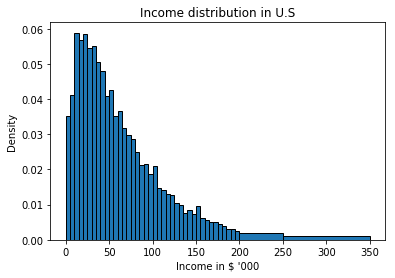

In [25]:
data.Midpoint = data.Midpoint/1000
weights = np.copy(data.Percent)
weights[40] = weights[40]/10
weights[41] = weights[41]/20

bins = np.append(np.linspace(0,200,41), [250,350])
plt.hist(data.Midpoint, bins = bins, edgecolor='k',weights=weights)
plt.xlabel("Income in $ '000")
plt.ylabel("Density")
plt.title("Income distribution in U.S")

Problem 3 b)

C:\Users\shekh\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
C:\Users\shekh\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


3.893445610482625 0.9757364292342248


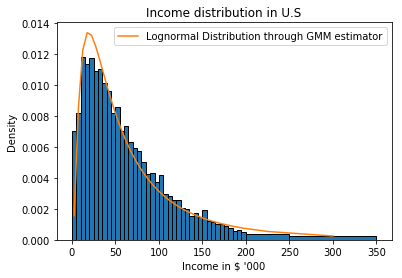

In [27]:
percent = np.ravel(np.array(data.Percent))
midpoint = np.ravel(np.array(data.Midpoint))

def pdf_lognormal(x, mu, sigma):
    f = ((1/(x*sigma*np.sqrt(2*np.pi))))*np.exp((-((np.log(x) - mu)**2)/(2*sigma**2)))
    return f
    
def dist_moments(mu, sigma):
    bins = np.append(np.linspace(0,200,41), [250,350])
    N = len(bins)
    moments = np.zeros(N-1)
    for i in range(N-1):
        moments[i] = intgr.quad(pdf_lognormal, bins[i], bins[i+1], args=(mu,sigma))[0]
    return moments

def error_func(mu, sigma, absolute):
    if absolute==True:
        error = (dist_moments(mu, sigma) - percent)
    else:
        error = (dist_moments(mu, sigma) - percent)/percent
    return error

def crit_func(params, *args):
    mu, sigma = params
    W, absolute = args
    error = error_func(mu, sigma, absolute)
    crit = (error.T)@W@error
    return crit

def GMM_estimate(percent):
    bins = np.append(np.linspace(0,200,41), [250,350])
    W = np.diag(percent)
    mu_init = np.log(69677)
    sigma_init = .98
    params_init = np.array([mu_init, sigma_init])
    gmm_args = (W, False)
    results = opt.minimize(crit_func, params_init, 
                           args=(gmm_args),bounds=((None, None), (1e-10, None)), tol=1e-15)
    return results
    
results1= GMM_estimate(percent)
mu_GMM, sigma_GMM = results1.x
print(mu_GMM, sigma_GMM)
crit_GMM1 = results1.fun

weights = np.copy(data.Percent)
weights[40] = (weights[40])/10
weights[41] = (weights[41])/20

bins = np.append(np.linspace(0,200,41), [250,350])
plt.hist(data.Midpoint, bins = bins,edgecolor='k', weights=weights/5)
plt.xlabel("Income in $ '000")
plt.ylabel("Density")
plt.title("Income distribution in U.S")

y_dom = pdf_lognormal(midpoint, mu_GMM, sigma_GMM)
plt.plot(midpoint, y_dom, label="Lognormal Distribution through GMM estimator")
plt.legend()
plt.show()

Problem 3 c)

1.367073639143119 48.06196475419925


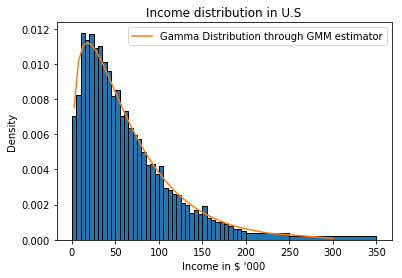

In [28]:
percent = np.ravel(np.array(data.Percent))
midpoint = np.ravel(np.array(data.Midpoint))

def pdf_gamma(x, alpha, beta):
    f = ((x)**(alpha-1))*(np.exp(-(x/beta)))/((beta**alpha)*(math.gamma(alpha)))
    return f

def dist_moments(alpha, beta):
    bins = np.append(np.linspace(0,200,41), [250,350])
    N = len(bins)
    moments = np.zeros(N-1)
    for i in range(N-1):
        moments[i] = intgr.quad(pdf_gamma, bins[i], bins[i+1], args=(alpha, beta))[0]
    return moments

def error_func(alpha, beta, absolute):
    if absolute==True:
        error = (dist_moments(alpha, beta) - percent)
    else:
        error = (dist_moments(alpha, beta) - percent)/percent
    return error

def crit_func(params, *args):
    alpha, beta = params
    W, absolute = args
    error = error_func(alpha, beta, absolute)
    crit = (error.T)@W@error
    return crit

def GMM_estimate_gamma(percent):
    bins = np.append(np.linspace(0,200,41), [250,350])
    W = np.diag(percent)
    alpha_init = 4
    beta_init = 15
    params_init = np.array([alpha_init, beta_init])
    gmm_args = (W, False)
    results = opt.minimize(crit_func, params_init, 
                           args=(gmm_args), method = 'L-BFGS-B', bounds=((1e-10, None), (1e-10, None)), tol=1e-15)
    return results

results = GMM_estimate_gamma(percent)
alpha_GMM, beta_GMM = results.x
print(alpha_GMM, beta_GMM)
crit_GMM_gamma = results.fun

weights = np.copy(data.Percent)
weights[40] = (weights[40])/10
weights[41] = (weights[41])/20

bins = np.append(np.linspace(0,200,41), [250,350])
plt.hist(data.Midpoint, bins = bins, edgecolor='k', weights=weights/5)
plt.xlabel("Income in $ '000")
plt.ylabel("Density")
plt.title("Income distribution in U.S")

y_dom = pdf_gamma(midpoint, alpha_GMM, beta_GMM)
plt.plot(midpoint, y_dom, label="Gamma Distribution through GMM estimator")
plt.legend()
plt.show()


Problem 3 d)

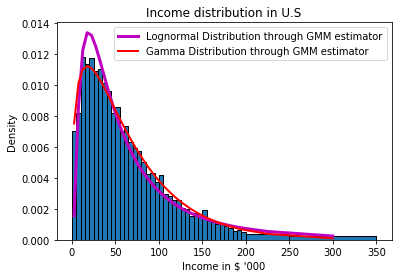

The minimized weighted errors in the Lognormal and Gamma estimations are:  0.03551648133227671 0.014084919473327158
The Lognormal GMM estimator gives a better fit


In [32]:
percent = np.ravel(np.array(data.Percent))
midpoint = np.ravel(np.array(data.Midpoint))

weights = np.copy(data.Percent)
weights[40] = (weights[40])/10
weights[41] = (weights[41])/20

bins = np.append(np.linspace(0,200,41), [250,350])
plt.hist(data.Midpoint, bins = bins, edgecolor='k',weights=weights/5)
plt.xlabel("Income in $ '000")
plt.ylabel("Density")
plt.title("Income distribution in U.S")

y_dom1 = pdf_lognormal(midpoint, mu_GMM, sigma_GMM)
plt.plot(midpoint, y_dom1,'m', label="Lognormal Distribution through GMM estimator", linewidth=3)
plt.legend()

y_dom2= pdf_gamma(midpoint, alpha_GMM, beta_GMM)
plt.plot(midpoint, y_dom2, 'r', label="Gamma Distribution through GMM estimator", linewidth=2,)
plt.legend()
plt.show()

print('The minimized weighted errors in the Lognormal and Gamma estimations are: ', crit_GMM1, crit_GMM_gamma)
print('The Lognormal GMM estimator gives a better fit')

Problem 3 e)

      fun: -2.7286965492701043e-08
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([4.73321258, 2.12727041])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 120
      nit: 11
   status: 0
  success: True
        x: array([ 3.56229865, 12.36230639])


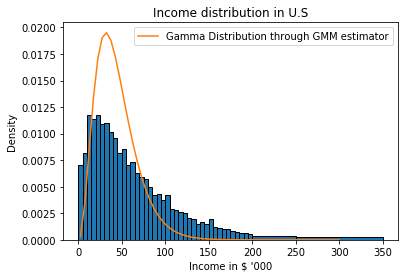

In [34]:
data = pd.read_table("usincmoms.txt", header = None)
data.columns = ["Percent", "Midpoint"]
data.Midpoint = data.Midpoint/1000
percent = np.ravel(np.array(data.Percent))
midpoint = np.ravel(np.array(data.Midpoint))

def pdf_gamma(x, alpha, beta):
    f = ((x)**(alpha-1))*(np.exp(-(x/beta)))/((beta**alpha)*math.gamma(alpha))
    return f

def dist_moments(alpha, beta):
    bins = np.append(np.linspace(0,200,41), [250,350])
    N = len(bins)
    moments = np.zeros(N-1)
    for i in range(N-1):
        moments[i] = intgr.quad(pdf_gamma, bins[i], bins[i+1], args=(alpha, beta))[0]
    return moments

def error_func(alpha, beta, absolute):
    if absolute==True:
        error = (dist_moments(alpha, beta) - percent)
    else:
        error = (dist_moments(alpha, beta) - percent)/percent
    return error

def crit_func(params, *args):
    alpha, beta = params
    W, absolute = args
    error = error_func(alpha, beta, absolute)
    crit = (error.T)@W@error
    return crit

def GMM_estimate_gamma(W, percent):
    bins = np.append(np.linspace(0,200,41), [250,350])
    alpha_init = 4
    beta_init = 15
    params_init = np.array([alpha_init, beta_init])
    gmm_args = (W, False)
    results = opt.minimize(crit_func, params_init, 
                           args=(gmm_args), method = 'L-BFGS-B', bounds=((1e-5, None), (1e-5, None)), tol=1e-15)
    return results

def W_estimator(n, N):
    W_init = np.identity(n)
    results = GMM_estimate_gamma(W_init, percent)
    alpha_1, beta_1 = results.x
    error_1 = error_func(alpha_1, beta_1, False)
    omega_1 = (1/N)*np.outer(error_1,error_1)
    W2 = np.linalg.pinv(omega_1)
    return W2

W2 = W_estimator(42, 121084000)
results_W2= GMM_estimate_gamma(W2, percent)
alpha_GMM_W2, beta_GMM_W2 = results_W2.x
crit_GMM_W2 = results_W2.fun
print(results_W2)

weights = np.copy(data.Percent)
weights[40] = (weights[40])/10
weights[41] = (weights[41])/20

bins = np.append(np.linspace(0,200,41), [250,350])
plt.hist(data.Midpoint, bins = bins, edgecolor ='k', weights=weights/5)
plt.xlabel("Income in $ '000")
plt.ylabel("Density")
plt.title("Income distribution in U.S")

y_dom = pdf_gamma(midpoint, alpha_GMM_W2, beta_GMM_W2)
plt.plot(midpoint, y_dom, label="Gamma Distribution through GMM estimator")
plt.legend()
plt.show()




# Problem 4

In [35]:
data = pd.read_csv('MacroSeries.txt', header = None)


def get_z(y,k,alpha):
    z = np.log(y) - alpha*np.log(k)
    return z

def crit_brock(params, *args):
    alpha, beta, rho, mu = params
    y, k, c, w = args
    moments = np.zeros(4)
    z_t = get_z(y, k, alpha)
    z_tp1 = z_t[1:]
    z_t = z_t[:-1]
    k_tp1 = k[1:]
    c_tp1 = c[1:]
    c_t = c[:-1]
    w_t = w[:-1]
    moments[0] = np.mean(z_tp1 - rho*z_t - (1-rho)*mu)
    moments[1] = np.mean((z_tp1 - rho*z_t - (1-rho)*mu)*z_t)
    moments[2] = np.mean((beta*alpha*np.exp(z_tp1)*(k_tp1**(alpha-1))*(c_t/c_tp1))-1)
    moments[3] = np.mean(((beta*alpha*np.exp(z_tp1)*(k_tp1**(alpha-1))*(c_t/c_tp1))-1)*w_t)
    I = np.identity(4)
    error = moments.T @ I @ moments
    return error

def GMM_brock(data):
    data.columns = ['c','k','w','r','y'] 
    c_data = np.ravel(np.array(data[['c']]))
    k_data = np.ravel(np.array(data[['k']]))
    w_data = np.ravel(np.array(data[['w']]))
    r_data = np.ravel(np.array(data[['r']]))
    y_data = np.ravel(np.array(data[['y']]))
    alpha_init = 0.5
    beta_init = 0.99
    rho_init = 0.8
    mu_init =0.3
    params_init = np.array([alpha_init, beta_init, rho_init, mu_init])
    gmm_args = y_data, k_data, c_data, w_data
    brock_results = opt.minimize(crit_brock, params_init, 
                                 args = (gmm_args), method= 'L-BFGS-B', bounds=((1e-3,0.99),
                                                                                (1e-1, None),(1e-3, None), (1e-3, None) ))
    return brock_results

results = GMM_brock(data)
alpha_GMM, beta_GMM, rho_GMM, mu_GMM = results.x
error = results.fun
print('alpha: ',alpha_GMM, 'beta: ', beta_GMM, 'rho: ', rho_GMM, 'mu: ', mu_GMM)
print('objective function: ', error)
results


alpha:  0.4561264839813746 beta:  0.9115892541346957 rho:  0.8000000004002705 mu:  0.3000000000087328
objective function:  293.52816879658263


      fun: 293.52816879658263
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 5.30263994e+06,  1.62653941e+06, -2.94304206e+03, -6.47210527e+01])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 155
      nit: 7
   status: 0
  success: True
        x: array([0.45612648, 0.91158925, 0.8       , 0.3       ])

# Problem 5 

In [37]:
mac_data = pd.read_csv('MacroSeries.txt', header = None)
mac_data.columns = ['c','k','w','r','y'] 
c_data = np.ravel(np.array(mac_data[['c']]))
k_data = np.ravel(np.array(mac_data[['k']]))
w_data = np.ravel(np.array(mac_data[['w']]))
r_data = np.ravel(np.array(mac_data[['r']]))
y_data = np.ravel(np.array(mac_data[['y']]))

def simulation(S, T, sigma, rho, mu):
    epsilon_matrix= np.zeros((T,S))
    #Generating epsilon from normal dist
    for i in range(S):
        u = np.random.uniform(size=T)
        epsilon_matrix[:,i] = stats.norm.ppf(u, loc=0, scale=sigma)
#     print(epsilon_matrix)
    return epsilon_matrix

def generate_z(S, T, sigma, rho, mu):
    #Generating time series of Z_t given epsilon
    epsilon_matrix = simulation(S, T, sigma, rho, mu)
    z_matrix=np.zeros((T,S))
    z0= mu
    for j in range(S):
        for i in range(T):
            z_matrix[i,j] = rho*z0 + (1-rho)*mu + epsilon_matrix[i,j]
            z0 = z_matrix[i,j]
#     print(z_matrix)
    return z_matrix
    
def generate_k(S, T, sigma, rho, mu, alpha, beta):
    z_matrix = generate_z(S, T, sigma, rho, mu)
    k_matrix=np.zeros((T+1,S))
    k0 = np.mean(k_data)
    k_matrix[0,:] = k0
    for i in range(1,T+1):
        k_matrix[i,:] = alpha*beta*np.exp(z_matrix[i-1,:])*(k_matrix[i-1,:])**alpha
    ktp1_matrix = k_matrix[1:, :]
    kt_matrix = k_matrix[:-1, :]
    print(kt_matrix)
    return kt_matrix, ktp1_matrix
    
def generate_w(S, T, sigma, rho, mu, alpha, beta):
    k_matrix = generate_k(S, T, sigma, rho, mu, alpha, beta)[0]
    z_matrix = generate_z(S, T, sigma, rho, mu)
    w_matrix = (1-alpha)*np.exp(z_matrix)*(k_matrix)**alpha
    return w_matrix

def generate_r(S, T, sigma, rho, mu, alpha, beta):
    k_matrix = generate_k(S, T, sigma, rho, mu, alpha, beta)[0]
    z_matrix = generate_z(S, T, sigma, rho, mu)
    r_matrix = alpha*np.exp(z_matrix)*(k_matrix)**(alpha-1)
    return r_matrix

def generate_c(S, T, sigma, rho, mu, alpha, beta):
    kt_matrix, ktp1_matrix = generate_k(S, T, sigma, rho, mu, alpha, beta)
    w_matrix = generate_w(S, T, sigma, rho, mu, alpha, beta)
    r_matrix = generate_r(S, T, sigma, rho, mu, alpha, beta)
    c_matrix = w_matrix + r_matrix*kt_matrix - ktp1_matrix
    return c_matrix

def generate_y(S, T, sigma, rho, mu, alpha, beta):
    z_matrix= generate_z(S, T, sigma, rho, mu)
    k_matrix = generate_k(S, T, sigma, rho, mu, alpha, beta)[0]
    y_matrix = np.exp(z_matrix)*(k_matrix)**alpha
    return y_matrix

def moments_average(S, T, sigma, rho, mu, alpha, beta):
    c_matrix = generate_c(S, T, sigma, rho, mu, alpha, beta)
    y_matrix = generate_y(S, T, sigma, rho, mu, alpha, beta)
    k_matrix = generate_k(S, T, sigma, rho, mu, alpha, beta)[0]
    mom_1 = np.mean(np.mean(c_matrix, axis=0))
    mom_2 = np.mean(np.mean(k_matrix, axis=0))
    mom_3 = np.mean(np.mean(c_matrix/y_matrix, axis=0))
    mom_4 = np.mean(np.var(y_matrix, axis=0))
    correlate_c = np.zeros(S)
    correlate_k = np.zeros(S)
    c_tminus = c_matrix[1:, :]
    c_t = c_matrix[:-1, :]
    for i in range(S):
        correlate_c[i] = np.float(np.correlate(c_t[:,i], c_tminus[:,i]))
    mom_5 = np.mean(correlate_c)
    for i in range(S):
        correlate_k[i] = np.float(np.correlate(c_matrix[:,i], k_matrix[:,i]))
    mom_6 = np.mean(correlate_k)
    return mom_1, mom_2, mom_3, mom_4, mom_5, mom_6

def data_moments(c, k, y):
    data_mom1 = np.mean(c)
    data_mom2 = np.mean(k)
    data_mom3 = np.mean(c/y)
    data_mom4 = np.var(y)
    data_mom5 = np.correlate(c[:-1], c[1:])
    data_mom6 = np.correlate(c,k)
    return data_mom1, data_mom2, data_mom3, data_mom4, data_mom5, data_mom6

def error_func(S, T, sigma, rho, mu, alpha, beta, absolute):
    mom_1, mom_2, mom_3, mom_4, mom_5, mom_6 = moments_average(S, T, sigma, rho, mu, alpha, beta)
    model_moments = np.array([mom_1, mom_2, mom_3, mom_4, mom_5, mom_6])
#     print(model_moments)
    data_m1, data_m2, data_m3, data_m4, data_m5, data_m6 = data_moments(c_data, k_data, y_data)
    data_moms= np.array([data_m1, data_m2, data_m3, data_m4, data_m5, data_m6])
    if absolute==True:
        error = model_moments - data_moms
    if absolute == False:
        error = (model_moments - data_moms)/data_moms
    return error

def crit_SMM(params, *args):
    alpha, rho, mu, sigma = params
    S, T, beta, absolute = args
    W = np.identity(6)
    error = error_func(S, T, sigma, rho, mu, alpha, beta, absolute)
    criter = error.T@W@error
    print(criter)
    return criter

alpha_init = 0.9
rho_init = 0.7
mu_init = 6
sigma_init = 0.2
params_init = np.array([alpha_init, rho_init, mu_init, sigma_init])
args_guess = 1000,100, 0.99, False
results_SMM = opt.minimize(crit_SMM, params_init, args=(args_guess), method= 'L-BFGS-B', 
                           bounds = ((0.01,0.99), (-0.99,0.99), (5,14), (0.01,1.1)))

print(results_SMM)

    
    
    
        
        
        
    

[[6.64398514e+06 6.64398514e+06 6.64398514e+06 ... 6.64398514e+06
  6.64398514e+06 6.64398514e+06]
 [6.07482444e+08 4.66402447e+08 2.25076271e+08 ... 5.75663234e+08
  4.55729989e+08 4.05514654e+08]
 [3.54365487e+10 2.49305913e+10 7.46871770e+09 ... 3.14804554e+10
  2.38973020e+10 1.73483283e+10]
 ...
 [3.10826580e+26 2.51882002e+24 2.36527751e+25 ... 2.32379261e+26
  1.79611199e+25 1.65290552e+25]
 [2.78837803e+26 2.25958947e+24 2.48145626e+25 ... 2.32415735e+26
  2.01589247e+25 1.50248999e+25]
 [2.62556383e+26 1.57137984e+24 2.32095956e+25 ... 2.51580110e+26
  1.74881365e+25 1.56099618e+25]]
[[6.64398514e+06 6.64398514e+06 6.64398514e+06 ... 6.64398514e+06
  6.64398514e+06 6.64398514e+06]
 [3.87520605e+08 4.29806476e+08 7.72678106e+08 ... 4.81905460e+08
  6.83466458e+08 6.37033061e+08]
 [1.75577388e+10 1.68050970e+10 3.57369601e+10 ... 2.97371424e+10
  2.41523516e+10 3.93504957e+10]
 ...
 [2.04330120e+26 3.23391044e+25 2.46893572e+26 ... 1.57975708e+26
  5.75558231e+25 1.27580961e+25]

[[6.64398514e+06 6.64398514e+06 6.64398514e+06 ... 6.64398514e+06
  6.64398514e+06 6.64398514e+06]
 [5.45546154e+08 4.56955797e+08 5.28701002e+08 ... 3.81215768e+08
  5.39079404e+08 6.06027091e+08]
 [3.25041563e+10 1.91393604e+10 1.95227039e+10 ... 2.05992704e+10
  2.18843774e+10 2.74713524e+10]
 ...
 [5.71144691e+25 5.25933762e+25 9.87774895e+24 ... 1.76673633e+26
  3.88802270e+26 2.94785504e+25]
 [4.75848107e+25 6.31420869e+25 9.17232802e+24 ... 2.72476434e+26
  2.92367276e+26 2.36303568e+25]
 [4.23454658e+25 5.60070235e+25 8.35134198e+24 ... 3.19106544e+26
  2.38047681e+26 1.44513440e+25]]
3.280006350694966e+77
[[6.64398514e+06 6.64398514e+06 6.64398514e+06 ... 6.64398514e+06
  6.64398514e+06 6.64398514e+06]
 [6.18490427e+08 3.63855913e+08 4.75208419e+08 ... 5.20903426e+08
  5.56532701e+08 5.00547610e+08]
 [3.75366767e+10 1.24268174e+10 1.88980897e+10 ... 3.36638729e+10
  2.24372867e+10 1.78310915e+10]
 ...
 [7.83881283e+25 6.21647901e+24 1.29219951e+25 ... 5.81540173e+25
  1.591537

[[6.64398514e+006 6.64398514e+006 6.64398514e+006 ... 6.64398514e+006
  6.64398514e+006 6.64398514e+006]
 [8.26149616e+008 8.25939800e+008 8.52378875e+008 ... 8.03898243e+008
  7.51242695e+008 8.35957578e+008]
 [9.66315927e+010 9.72911007e+010 9.68385141e+010 ... 9.93266177e+010
  9.66755394e+010 9.72867740e+010]
 ...
 [1.85197089e+137 1.93585959e+137 1.90095186e+137 ... 1.71721658e+137
  1.81041482e+137 1.88252151e+137]
 [1.16529705e+138 1.12315688e+138 1.14086866e+138 ... 1.15096082e+138
  1.09642098e+138 1.11929233e+138]
 [6.95764344e+138 7.20051780e+138 7.12741039e+138 ... 6.45959246e+138
  6.71310153e+138 7.02210838e+138]]
[[6.64398514e+006 6.64398514e+006 6.64398514e+006 ... 6.64398514e+006
  6.64398514e+006 6.64398514e+006]
 [8.15236626e+008 8.60022907e+008 8.60840338e+008 ... 8.73229296e+008
  8.16635656e+008 8.06318184e+008]
 [9.84614579e+010 9.74929545e+010 9.71694241e+010 ... 9.73784374e+010
  9.84733411e+010 9.71601394e+010]
 ...
 [1.82449704e+137 1.92285810e+137 1.80024030

C:\Users\shekh\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:663: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


[[6.64398514e+006 6.64398514e+006 6.64398514e+006 ... 6.64398514e+006
  6.64398514e+006 6.64398514e+006]
 [8.30866044e+008 9.31466350e+008 9.35071852e+008 ... 9.26692814e+008
  7.86757074e+008 7.80386742e+008]
 [9.75336958e+010 9.68313341e+010 9.75599106e+010 ... 9.94821633e+010
  9.73919908e+010 9.84355269e+010]
 ...
 [1.84679759e+137 1.79772950e+137 1.79141214e+137 ... 1.78992262e+137
  1.77385795e+137 1.77145793e+137]
 [1.03039622e+138 9.98431226e+137 1.17364009e+138 ... 1.17149072e+138
  1.15731073e+138 1.09699562e+138]
 [6.95410351e+138 6.75341825e+138 6.67440411e+138 ... 6.69733084e+138
  6.65931337e+138 6.64277187e+138]]
[[6.64398514e+006 6.64398514e+006 6.64398514e+006 ... 6.64398514e+006
  6.64398514e+006 6.64398514e+006]
 [8.48287827e+008 7.19117003e+008 7.73755851e+008 ... 7.04080953e+008
  7.36611141e+008 8.21280171e+008]
 [9.63806527e+010 9.74088904e+010 9.90385861e+010 ... 9.61229723e+010
  9.72612799e+010 9.76915053e+010]
 ...
 [1.70118724e+137 1.75201784e+137 1.84571238

[[6.64398514e+006 6.64398514e+006 6.64398514e+006 ... 6.64398514e+006
  6.64398514e+006 6.64398514e+006]
 [8.23187427e+008 7.59982377e+008 8.04199072e+008 ... 8.55192038e+008
  7.82270066e+008 8.48699917e+008]
 [9.86946240e+010 9.94027269e+010 9.74003840e+010 ... 9.62224456e+010
  9.66116685e+010 9.73022905e+010]
 ...
 [1.78362423e+137 1.76730678e+137 1.78454227e+137 ... 1.86193662e+137
  1.85363197e+137 1.81831394e+137]
 [1.19183538e+138 1.13845051e+138 1.10814009e+138 ... 1.18585710e+138
  1.11654288e+138 1.17369234e+138]
 [6.68283716e+138 6.56737859e+138 6.66213154e+138 ... 6.92043536e+138
  6.96628037e+138 6.84325193e+138]]
[[6.64398514e+006 6.64398514e+006 6.64398514e+006 ... 6.64398514e+006
  6.64398514e+006 6.64398514e+006]
 [8.32828612e+008 8.12896495e+008 8.79896981e+008 ... 9.18990197e+008
  8.79089811e+008 8.56072374e+008]
 [9.59775904e+010 9.77864140e+010 9.82178220e+010 ... 9.73304919e+010
  9.75312630e+010 9.80034871e+010]
 ...
 [1.77822367e+137 1.89767299e+137 1.76138031

[[6.64398514e+06 6.64398514e+06 6.64398514e+06 ... 6.64398514e+06
  6.64398514e+06 6.64398514e+06]
 [4.08381252e+08 6.19957444e+08 3.61258430e+08 ... 4.82609088e+08
  5.01527533e+08 5.39082364e+08]
 [1.72011425e+10 3.05308039e+10 1.15771262e+10 ... 2.60520494e+10
  1.72780726e+10 2.67693429e+10]
 ...
 [9.20091598e+26 4.46579246e+24 1.63838011e+26 ... 2.94997778e+25
  3.72000690e+26 4.54902464e+25]
 [7.03018788e+26 3.34022649e+24 1.48635291e+26 ... 1.82940902e+25
  2.64461477e+26 3.86498875e+25]
 [5.32325839e+26 2.60046816e+24 1.33391586e+26 ... 1.45063657e+25
  2.00490518e+26 4.36624418e+25]]
[[6.64398514e+06 6.64398514e+06 6.64398514e+06 ... 6.64398514e+06
  6.64398514e+06 6.64398514e+06]
 [4.76777394e+08 5.18152202e+08 4.81181240e+08 ... 5.26837831e+08
  4.18124756e+08 2.97793937e+08]
 [2.15788158e+10 3.76516078e+10 1.83942873e+10 ... 3.56405688e+10
  1.83139653e+10 1.43945461e+10]
 ...
 [1.06838346e+25 1.13409933e+25 7.91582049e+25 ... 3.89812043e+25
  8.55606836e+24 1.16980664e+26]

[[6.64398514e+06 6.64398514e+06 6.64398514e+06 ... 6.64398514e+06
  6.64398514e+06 6.64398514e+06]
 [1.73830310e+00 1.75311086e+00 1.63410659e+00 ... 1.82794430e+00
  1.82731957e+00 1.88022784e+00]
 [1.46851091e+00 1.45213375e+00 1.56859044e+00 ... 1.38819569e+00
  1.37628855e+00 1.34800684e+00]
 ...
 [1.49862214e+00 1.39611344e+00 1.40337664e+00 ... 1.55144026e+00
  1.62340123e+00 1.71008576e+00]
 [1.45168535e+00 1.54429367e+00 1.53302166e+00 ... 1.38916022e+00
  1.33225143e+00 1.25922811e+00]
 [1.48946458e+00 1.42601424e+00 1.41945741e+00 ... 1.55110585e+00
  1.62342905e+00 1.70625498e+00]]
[[6.64398514e+06 6.64398514e+06 6.64398514e+06 ... 6.64398514e+06
  6.64398514e+06 6.64398514e+06]
 [1.69015470e+00 1.56251107e+00 1.72041527e+00 ... 1.87321026e+00
  1.73106734e+00 1.73806657e+00]
 [1.51302146e+00 1.62435311e+00 1.46364345e+00 ... 1.34276452e+00
  1.47647126e+00 1.45716227e+00]
 ...
 [1.36460669e+00 1.46249987e+00 1.43214348e+00 ... 1.52718507e+00
  1.48977651e+00 1.39868252e+00]

[[6.64398514e+06 6.64398514e+06 6.64398514e+06 ... 6.64398514e+06
  6.64398514e+06 6.64398514e+06]
 [1.70458069e+00 1.61270410e+00 1.55220507e+00 ... 1.72802134e+00
  1.80809792e+00 1.87572726e+00]
 [1.51958967e+00 1.54109611e+00 1.64977522e+00 ... 1.45623820e+00
  1.40014641e+00 1.33786059e+00]
 ...
 [1.40454393e+00 1.35433156e+00 1.41567470e+00 ... 1.52132292e+00
  1.61937103e+00 1.39340586e+00]
 [1.55550252e+00 1.63929258e+00 1.52450633e+00 ... 1.43276882e+00
  1.34823884e+00 1.52142390e+00]
 [1.36381730e+00 1.32425000e+00 1.42860079e+00 ... 1.49096585e+00
  1.62038623e+00 1.43837169e+00]]
[[6.64398514e+06 6.64398514e+06 6.64398514e+06 ... 6.64398514e+06
  6.64398514e+06 6.64398514e+06]
 [1.71301530e+00 2.04126704e+00 1.72855674e+00 ... 1.72386026e+00
  1.71609221e+00 1.82560542e+00]
 [1.46361978e+00 1.25275857e+00 1.45454474e+00 ... 1.47736144e+00
  1.49388916e+00 1.40268071e+00]
 ...
 [1.74869493e+00 1.44530506e+00 1.34144537e+00 ... 1.51436400e+00
  1.52862649e+00 1.36054335e+00]

[[6643985.13829907 6643985.13829907 6643985.13829907 ... 6643985.13829907
  6643985.13829907 6643985.13829907]
 [2547978.63728799 2307918.34401064 2313174.14980173 ... 2361661.73033501
  2445927.18312993 2323119.96111922]
 [1145080.78195598 1359495.02695307 1202209.0498082  ... 1403872.9458376
  1389978.76940148 1647183.41201215]
 ...
 [ 482075.77103634  356703.95020631  531277.4041758  ...  510471.20597173
   509745.25582653  519608.91274589]
 [ 477019.74941952  452432.05109665  471196.15806479 ...  484120.61799569
   458121.37775065  684281.04683825]
 [ 486304.59936642  433247.44674719  348052.67988058 ...  487497.07738061
   443590.60621076  669496.85414521]]
4.827305073689418
[[6643985.13829907 6643985.13829907 6643985.13829907 ... 6643985.13829907
  6643985.13829907 6643985.13829907]
 [1735789.68756236 2622240.88163986 2498747.04076646 ... 2333228.69054644
  2155917.93180705 2210359.83780465]
 [1052294.19031249 1627190.38542336 1130241.46451147 ... 1200292.01331197
  1314598.49721

[[6643985.13829907 6643985.13829907 6643985.13829907 ... 6643985.13829907
  6643985.13829907 6643985.13829907]
 [1649101.28264916 2656853.89825299 1937949.60572017 ... 2439408.58160354
  2778897.85477507 2289240.95388336]
 [ 962398.31968247 1517501.70456177 1273793.65084233 ... 1134832.74081025
  1227208.14814399 1239335.57795411]
 ...
 [ 506325.9730491   388959.70791381  455720.31810777 ...  461570.50271377
   502032.06302319  424283.20700617]
 [ 521924.97348358  377301.13974752  407869.52262056 ...  354790.92492021
   508006.8768943   496044.4593642 ]
 [ 427981.74819896  468502.38254648  496305.17054767 ...  403710.31034442
   406889.03069086  518953.21570635]]
[[6643985.13829907 6643985.13829907 6643985.13829907 ... 6643985.13829907
  6643985.13829907 6643985.13829907]
 [2591148.53945087 2558183.47546944 2118614.95749976 ... 1993415.62111178
  2069489.3446505  1709742.27588682]
 [1259484.08061328 1020677.70404992 1109100.68088063 ... 1308830.57703382
  1082291.0917845   937795.99387

[[6.64398514e+06 6.64398514e+06 6.64398514e+06 ... 6.64398514e+06
  6.64398514e+06 6.64398514e+06]
 [1.11177142e+08 7.27622388e+07 1.11815688e+08 ... 1.00663146e+08
  8.73956717e+07 9.77830480e+07]
 [9.60458570e+08 5.94357486e+08 1.03968808e+09 ... 8.13090340e+08
  5.21648340e+08 7.01079679e+08]
 ...
 [2.43718696e+12 4.52095937e+12 1.93884878e+12 ... 2.22233833e+12
  2.23203061e+12 2.22588857e+12]
 [2.32932575e+12 4.19202010e+12 1.95075297e+12 ... 2.04239766e+12
  2.18847772e+12 2.11043502e+12]
 [2.44068953e+12 3.91123298e+12 1.77168091e+12 ... 1.94885727e+12
  2.12436811e+12 1.84030296e+12]]
[[6.64398514e+06 6.64398514e+06 6.64398514e+06 ... 6.64398514e+06
  6.64398514e+06 6.64398514e+06]
 [1.17332101e+08 9.70125574e+07 7.87399790e+07 ... 5.72439425e+07
  8.05165517e+07 7.60203624e+07]
 [8.35951885e+08 9.00215441e+08 5.14763347e+08 ... 4.81918185e+08
  6.66490218e+08 5.56247939e+08]
 ...
 [1.30465250e+12 2.38489879e+12 2.12205776e+12 ... 1.40857767e+12
  1.86859037e+12 2.26506319e+12]

[[6.64398514e+06 6.64398514e+06 6.64398514e+06 ... 6.64398514e+06
  6.64398514e+06 6.64398514e+06]
 [1.09523812e+08 7.11513438e+07 6.01184074e+07 ... 7.56410778e+07
  7.40374294e+07 6.40840885e+07]
 [1.07582596e+09 6.59982384e+08 3.64972510e+08 ... 5.00785508e+08
  6.34236055e+08 4.87381244e+08]
 ...
 [1.77315971e+12 4.23651218e+12 2.92686317e+12 ... 5.98516218e+12
  2.05362186e+12 8.67169734e+11]
 [2.06669817e+12 4.04185627e+12 2.09089729e+12 ... 5.77031625e+12
  2.04124332e+12 1.12225232e+12]
 [2.30832084e+12 3.12133193e+12 2.05281424e+12 ... 5.06395542e+12
  1.87530942e+12 1.43005877e+12]]
1.271096324361113e+22
[[6.64398514e+06 6.64398514e+06 6.64398514e+06 ... 6.64398514e+06
  6.64398514e+06 6.64398514e+06]
 [9.62002237e+07 1.27261063e+08 6.87504820e+07 ... 9.38500794e+07
  9.07957576e+07 9.47626480e+07]
 [7.85548879e+08 1.14650963e+09 4.33836646e+08 ... 5.98032846e+08
  7.55597969e+08 8.13490901e+08]
 ...
 [3.63707698e+12 2.01076029e+12 2.45600962e+12 ... 2.35347461e+12
  4.372225

[[6.64398514e+06 6.64398514e+06 6.64398514e+06 ... 6.64398514e+06
  6.64398514e+06 6.64398514e+06]
 [2.43437117e+08 2.77601970e+08 2.91140142e+08 ... 2.63977916e+08
  3.01174562e+08 3.82210759e+08]
 [5.46572059e+09 9.85713604e+09 5.39945786e+09 ... 6.42733453e+09
  4.67072246e+09 1.13445621e+10]
 ...
 [8.70061150e+18 2.87954737e+18 3.16624177e+19 ... 3.70674077e+18
  2.84173040e+19 1.78599608e+19]
 [7.34570609e+18 2.76330996e+18 5.34480054e+19 ... 3.76071281e+18
  2.23887786e+19 1.50305557e+19]
 [6.42113172e+18 3.16337264e+18 9.02012694e+19 ... 4.39204823e+18
  2.32755168e+19 1.22849887e+19]]
[[6.64398514e+06 6.64398514e+06 6.64398514e+06 ... 6.64398514e+06
  6.64398514e+06 6.64398514e+06]
 [3.65245663e+08 1.83897340e+08 2.47537549e+08 ... 2.27622006e+08
  1.68379841e+08 2.00045590e+08]
 [8.26647668e+09 1.94439841e+09 7.08790700e+09 ... 5.37537962e+09
  3.13643986e+09 4.17080239e+09]
 ...
 [1.09388080e+19 5.21832591e+18 1.64889306e+19 ... 7.47099340e+18
  2.55461343e+18 4.34795596e+18]

[[6.64398514e+06 6.64398514e+06 6.64398514e+06 ... 6.64398514e+06
  6.64398514e+06 6.64398514e+06]
 [2.62668499e+08 2.91466984e+08 2.59215110e+08 ... 2.53665417e+08
  2.90689016e+08 3.97597271e+08]
 [5.43725055e+09 6.82108075e+09 6.60819927e+09 ... 5.97091096e+09
  9.30258821e+09 1.07287750e+10]
 ...
 [6.77036611e+18 6.86339773e+18 1.10972963e+19 ... 4.86443362e+18
  1.85253508e+18 5.33820283e+18]
 [5.58862610e+18 6.59195679e+18 1.20357966e+19 ... 5.85882785e+18
  2.75432002e+18 7.09532428e+18]
 [7.04057877e+18 5.72512462e+18 1.34608400e+19 ... 8.32342774e+18
  4.98184730e+18 6.26106732e+18]]
[[6.64398514e+06 6.64398514e+06 6.64398514e+06 ... 6.64398514e+06
  6.64398514e+06 6.64398514e+06]
 [2.81202136e+08 2.18009581e+08 2.44687793e+08 ... 2.59738651e+08
  2.57617945e+08 2.97111687e+08]
 [5.20161769e+09 7.01688805e+09 8.99064157e+09 ... 6.08131257e+09
  7.30560793e+09 8.99048756e+09]
 ...
 [1.05884604e+19 2.29204749e+18 1.01230197e+19 ... 3.67456340e+19
  4.24228732e+18 2.01855633e+19]

[[6.64398514e+06 6.64398514e+06 6.64398514e+06 ... 6.64398514e+06
  6.64398514e+06 6.64398514e+06]
 [4.16686679e+08 4.32584194e+08 4.29455216e+08 ... 4.45740695e+08
  3.72391585e+08 3.85026020e+08]
 [1.00109318e+10 2.31105687e+10 1.27636464e+10 ... 1.78835881e+10
  1.23916300e+10 1.75545398e+10]
 ...
 [3.01811583e+23 6.42769794e+22 2.65170964e+22 ... 1.96058128e+23
  1.44159144e+23 2.05873143e+23]
 [1.79371619e+23 4.94070853e+22 5.33664623e+22 ... 1.62017421e+23
  1.91292011e+23 1.83963805e+23]
 [1.31377862e+23 5.15972642e+22 6.48075449e+22 ... 1.51567275e+23
  2.70552501e+23 1.77585866e+23]]
[[6.64398514e+06 6.64398514e+06 6.64398514e+06 ... 6.64398514e+06
  6.64398514e+06 6.64398514e+06]
 [3.31906553e+08 4.26918027e+08 3.13606899e+08 ... 5.56045972e+08
  3.51028389e+08 4.93809845e+08]
 [1.55655198e+10 1.96407863e+10 9.63350511e+09 ... 2.65385237e+10
  1.22073482e+10 2.25101178e+10]
 ...
 [8.21862016e+23 1.26034347e+23 1.34843956e+23 ... 1.32179401e+23
  2.93066296e+22 1.42643787e+23]

[[6.64398514e+06 6.64398514e+06 6.64398514e+06 ... 6.64398514e+06
  6.64398514e+06 6.64398514e+06]
 [4.37633673e+08 2.52768227e+08 4.41504684e+08 ... 5.08607713e+08
  3.55015919e+08 2.85515632e+08]
 [1.43323706e+10 7.63508095e+09 2.23546047e+10 ... 2.31311829e+10
  1.60297086e+10 9.36051605e+09]
 ...
 [8.53348627e+24 1.11224939e+25 1.44346491e+24 ... 6.41407911e+23
  1.12091387e+25 1.43239716e+25]
 [5.52430751e+24 8.26631118e+24 1.28894930e+24 ... 6.48542337e+23
  1.11714542e+25 1.54912496e+25]
 [2.99910629e+24 7.79598614e+24 1.14468687e+24 ... 7.08753077e+23
  8.70976881e+24 1.22175563e+25]]
[[6.64398514e+06 6.64398514e+06 6.64398514e+06 ... 6.64398514e+06
  6.64398514e+06 6.64398514e+06]
 [5.02934384e+08 4.58880506e+08 3.38833150e+08 ... 3.06856971e+08
  3.98096355e+08 6.09188317e+08]
 [2.79653352e+10 1.78913474e+10 1.69548771e+10 ... 1.50656128e+10
  1.02616176e+10 3.23628439e+10]
 ...
 [2.07163320e+24 1.16902272e+24 6.25115474e+24 ... 1.09779504e+24
  4.63486835e+23 1.51052550e+25]

[[6.64398514e+06 6.64398514e+06 6.64398514e+06 ... 6.64398514e+06
  6.64398514e+06 6.64398514e+06]
 [5.85011674e+08 5.29208342e+08 5.89416842e+08 ... 4.96871356e+08
  4.63366595e+08 3.99780493e+08]
 [3.84527320e+10 2.07955863e+10 3.14231439e+10 ... 2.66093514e+10
  1.92789460e+10 2.73013675e+10]
 ...
 [2.36975423e+25 4.58303736e+24 4.62382644e+23 ... 3.07759927e+24
  2.03535572e+24 3.40909047e+24]
 [2.23301654e+25 3.75276521e+24 4.40147342e+23 ... 2.64334867e+24
  2.27951852e+24 3.27672350e+24]
 [2.73031353e+25 3.50193094e+24 4.85842667e+23 ... 2.97077935e+24
  2.65930909e+24 2.81417289e+24]]
4.0108293111775486e+73
[[6.64398514e+06 6.64398514e+06 6.64398514e+06 ... 6.64398514e+06
  6.64398514e+06 6.64398514e+06]
 [5.64498524e+08 5.62368014e+08 4.80704744e+08 ... 4.44308820e+08
  5.12026806e+08 3.99814344e+08]
 [2.22447245e+10 3.37960915e+10 1.94661182e+10 ... 1.76564067e+10
  1.97503379e+10 1.44813774e+10]
 ...
 [4.56866852e+24 8.44707891e+24 6.69775396e+24 ... 4.22379857e+24
  1.96815

[[6.64398514e+06 6.64398514e+06 6.64398514e+06 ... 6.64398514e+06
  6.64398514e+06 6.64398514e+06]
 [7.35787625e+08 4.11683327e+08 6.12445649e+08 ... 4.88715783e+08
  3.45666274e+08 4.93959357e+08]
 [4.64479304e+10 1.65953506e+10 4.24915131e+10 ... 2.22365347e+10
  1.17721431e+10 2.48426734e+10]
 ...
 [3.13712951e+25 1.48534698e+25 2.18708185e+24 ... 7.76484679e+24
  1.50995799e+25 2.88794681e+25]
 [2.82111801e+25 1.63142904e+25 2.33181427e+24 ... 7.25456412e+24
  1.44424664e+25 4.76142303e+25]
 [2.70486487e+25 1.47931529e+25 2.35261471e+24 ... 6.28225977e+24
  1.16788777e+25 6.63147761e+25]]
[[6.64398514e+06 6.64398514e+06 6.64398514e+06 ... 6.64398514e+06
  6.64398514e+06 6.64398514e+06]
 [4.83033426e+08 4.66283970e+08 4.96705513e+08 ... 3.81416538e+08
  6.98067148e+08 5.47364059e+08]
 [1.99318826e+10 2.48725097e+10 2.32362817e+10 ... 1.40105791e+10
  3.23942189e+10 3.31260367e+10]
 ...
 [1.06889871e+25 1.63593772e+24 2.25810306e+25 ... 7.25889333e+24
  2.92671214e+25 7.64429826e+24]

[[6.64398514e+06 6.64398514e+06 6.64398514e+06 ... 6.64398514e+06
  6.64398514e+06 6.64398514e+06]
 [5.03529146e+08 6.05606419e+08 5.46896629e+08 ... 4.60424115e+08
  3.85483785e+08 3.87953319e+08]
 [2.85906809e+10 4.04216817e+10 2.40591472e+10 ... 2.55851048e+10
  1.39019737e+10 1.47035853e+10]
 ...
 [1.54613085e+25 1.13105764e+25 9.80292798e+25 ... 3.50734346e+25
  2.57277106e+25 3.03163247e+25]
 [1.30468154e+25 1.54843267e+25 9.05350813e+25 ... 3.05254491e+25
  3.60165214e+25 3.19005528e+25]
 [1.29270971e+25 1.42218085e+25 8.00099332e+25 ... 2.60302922e+25
  3.94143831e+25 3.14977899e+25]]
[[6.64398514e+06 6.64398514e+06 6.64398514e+06 ... 6.64398514e+06
  6.64398514e+06 6.64398514e+06]
 [3.89983321e+08 3.45381987e+08 5.14407868e+08 ... 5.24897769e+08
  7.67372182e+08 9.36930761e+08]
 [1.73880084e+10 1.46391197e+10 2.37488792e+10 ... 3.73165644e+10
  5.94470587e+10 4.06364086e+10]
 ...
 [3.18156092e+25 4.59476580e+25 5.21712878e+25 ... 1.12973676e+25
  5.62542965e+25 6.64988401e+24]

[[6.64398514e+06 6.64398514e+06 6.64398514e+06 ... 6.64398514e+06
  6.64398514e+06 6.64398514e+06]
 [3.35446002e+08 8.52444293e+08 6.31130571e+08 ... 4.61839511e+08
  6.19319264e+08 6.02510183e+08]
 [9.21927722e+09 6.41883510e+10 2.67983647e+10 ... 2.39259720e+10
  2.49004931e+10 5.35210248e+10]
 ...
 [7.70281805e+25 2.29353193e+24 1.23203885e+25 ... 4.07497348e+25
  2.81919761e+25 8.46512032e+24]
 [8.53177478e+25 2.63548128e+24 9.78140036e+24 ... 5.37706633e+25
  2.96897937e+25 8.01868429e+24]
 [9.44114965e+25 3.19536249e+24 8.67835023e+24 ... 5.14616230e+25
  2.66992842e+25 6.35160895e+24]]
[[6.64398514e+06 6.64398514e+06 6.64398514e+06 ... 6.64398514e+06
  6.64398514e+06 6.64398514e+06]
 [3.86040345e+08 4.78091358e+08 6.91336858e+08 ... 4.49151188e+08
  9.56999419e+08 4.56821548e+08]
 [1.08344720e+10 2.41937542e+10 4.38238703e+10 ... 2.10379316e+10
  8.30147768e+10 2.18956291e+10]
 ...
 [9.19952267e+25 3.44844378e+24 5.54620063e+25 ... 5.43856634e+26
  2.92536745e+24 3.35715804e+26]

[[6.64398514e+06 6.64398514e+06 6.64398514e+06 ... 6.64398514e+06
  6.64398514e+06 6.64398514e+06]
 [3.49117708e+08 5.31134758e+08 6.89173318e+08 ... 6.80936891e+08
  3.57513440e+08 3.45738724e+08]
 [1.60285937e+10 2.51353505e+10 4.89326512e+10 ... 4.21460128e+10
  2.21514226e+10 1.22864383e+10]
 ...
 [8.92271676e+25 2.01138513e+24 2.62599380e+25 ... 1.66391607e+25
  1.34211409e+26 9.58762844e+25]
 [1.34788762e+26 2.69567805e+24 2.19137047e+25 ... 1.56066034e+25
  8.14346020e+25 1.03324570e+26]
 [1.90850116e+26 3.43887927e+24 1.75794545e+25 ... 1.77492548e+25
  4.76736717e+25 1.07555177e+26]]
[[6.64398514e+06 6.64398514e+06 6.64398514e+06 ... 6.64398514e+06
  6.64398514e+06 6.64398514e+06]
 [3.98041334e+08 3.23712303e+08 4.00431087e+08 ... 5.38841000e+08
  4.13330689e+08 3.96508059e+08]
 [1.39147166e+10 1.07338671e+10 2.02700153e+10 ... 2.21678035e+10
  1.24069561e+10 1.10975035e+10]
 ...
 [2.60668407e+24 1.12122395e+25 3.02256230e+24 ... 7.35128636e+24
  1.75430521e+24 1.01620683e+24]

[[6.64398514e+06 6.64398514e+06 6.64398514e+06 ... 6.64398514e+06
  6.64398514e+06 6.64398514e+06]
 [3.51767383e+08 6.59656663e+08 5.62645738e+08 ... 6.46071184e+08
  5.64048895e+08 6.58223661e+08]
 [1.64615872e+10 3.80480947e+10 3.21992940e+10 ... 3.71407031e+10
  3.69028451e+10 3.13676257e+10]
 ...
 [1.14568601e+26 9.32322916e+24 1.32094942e+26 ... 4.20806288e+25
  2.44872099e+25 3.10983138e+26]
 [1.55357491e+26 1.03161768e+25 1.55774323e+26 ... 5.40760500e+25
  3.14643990e+25 3.01201646e+26]
 [1.16682601e+26 1.37963412e+25 1.65430843e+26 ... 6.19398698e+25
  3.63239278e+25 2.44069205e+26]]
1.2208409877926485e+77
[[6.64398514e+06 6.64398514e+06 6.64398514e+06 ... 6.64398514e+06
  6.64398514e+06 6.64398514e+06]
 [4.51987305e+08 5.00842404e+08 5.27312386e+08 ... 3.35410420e+08
  1.23705609e+09 4.97555501e+08]
 [2.29134519e+10 1.87019412e+10 2.96471884e+10 ... 1.37843445e+10
  5.60862071e+10 3.31476969e+10]
 ...
 [8.41194378e+25 1.50096981e+25 4.80028665e+24 ... 1.50451057e+26
  8.85723

[[6.64398514e+06 6.64398514e+06 6.64398514e+06 ... 6.64398514e+06
  6.64398514e+06 6.64398514e+06]
 [4.96134313e+08 5.50741432e+08 5.96688817e+08 ... 7.22087541e+08
  4.99489815e+08 4.41283828e+08]
 [3.29143642e+10 2.47431418e+10 2.98781691e+10 ... 4.68506531e+10
  3.46412135e+10 2.80970110e+10]
 ...
 [2.68226256e+25 7.03403636e+25 1.87975305e+25 ... 7.67561497e+24
  4.24637033e+25 1.01224714e+26]
 [2.46588904e+25 4.46882097e+25 1.67872591e+25 ... 6.02020175e+24
  4.46906370e+25 1.32415986e+26]
 [2.56266586e+25 4.06345739e+25 1.50594844e+25 ... 4.56843545e+24
  5.42668758e+25 1.32268389e+26]]
[[6.64398514e+06 6.64398514e+06 6.64398514e+06 ... 6.64398514e+06
  6.64398514e+06 6.64398514e+06]
 [4.04400463e+08 3.21177734e+08 6.60962077e+08 ... 5.10099276e+08
  3.67743122e+08 3.43318945e+08]
 [1.61420814e+10 9.80501168e+09 5.31709472e+10 ... 2.35624268e+10
  1.65021778e+10 1.33219591e+10]
 ...
 [7.62871170e+24 4.90999458e+25 3.71162706e+25 ... 2.69136879e+24
  8.90129393e+24 7.98694517e+25]

[[6.64398514e+06 6.64398514e+06 6.64398514e+06 ... 6.64398514e+06
  6.64398514e+06 6.64398514e+06]
 [3.50259791e+08 3.12667533e+08 7.10254520e+08 ... 3.46152735e+08
  7.86506657e+08 6.92574288e+08]
 [1.70482768e+10 1.42825853e+10 3.65679827e+10 ... 1.17554912e+10
  4.81243022e+10 4.50054314e+10]
 ...
 [9.54025840e+24 5.32448686e+24 8.16528612e+24 ... 1.49041610e+26
  2.24394569e+26 2.85683749e+24]
 [6.48521672e+24 6.67247520e+24 4.37111197e+24 ... 1.77238518e+26
  2.67125173e+26 2.26534139e+24]
 [3.91604273e+24 1.13994861e+25 2.98794511e+24 ... 1.56772817e+26
  3.46028158e+26 2.53874556e+24]]
[[6.64398514e+06 6.64398514e+06 6.64398514e+06 ... 6.64398514e+06
  6.64398514e+06 6.64398514e+06]
 [4.80319472e+08 4.41847614e+08 5.73105057e+08 ... 3.46670228e+08
  4.42437971e+08 3.22950332e+08]
 [2.68867146e+10 1.81418785e+10 3.48393524e+10 ... 1.76225817e+10
  1.84026982e+10 1.06722383e+10]
 ...
 [4.93218160e+26 5.05949649e+25 4.78512143e+25 ... 6.91972959e+24
  1.33781040e+26 3.26424522e+24]

[[6.64398514e+06 6.64398514e+06 6.64398514e+06 ... 6.64398514e+06
  6.64398514e+06 6.64398514e+06]
 [6.62055306e+08 5.63030046e+08 5.51987145e+08 ... 4.87526757e+08
  5.39910993e+08 9.60868671e+08]
 [2.94441934e+10 2.10676877e+10 2.89286938e+10 ... 2.15739182e+10
  2.68053343e+10 6.63565722e+10]
 ...
 [1.84423431e+26 1.66379085e+25 8.18145522e+25 ... 2.75843434e+25
  1.46031495e+26 4.74540331e+25]
 [2.07791149e+26 2.26366584e+25 1.03203209e+26 ... 2.78051027e+25
  2.08937741e+26 4.41167996e+25]
 [2.70737249e+26 3.64527693e+25 1.20841494e+26 ... 3.71815527e+25
  3.19312425e+26 3.21438343e+25]]
[[6.64398514e+06 6.64398514e+06 6.64398514e+06 ... 6.64398514e+06
  6.64398514e+06 6.64398514e+06]
 [4.84694526e+08 9.42450582e+08 7.47764668e+08 ... 8.54690873e+08
  3.83898240e+08 4.40873295e+08]
 [1.76916297e+10 5.24379647e+10 3.46532189e+10 ... 7.99430546e+10
  1.24161491e+10 1.98087490e+10]
 ...
 [7.73429437e+24 2.66437969e+26 9.10771059e+24 ... 9.96505661e+24
  3.95658289e+25 1.46745675e+26]

[[6.64398514e+06 6.64398514e+06 6.64398514e+06 ... 6.64398514e+06
  6.64398514e+06 6.64398514e+06]
 [3.78914739e+08 4.80437805e+08 3.82295172e+08 ... 4.94626583e+08
  6.19199668e+08 2.55287715e+08]
 [1.82652565e+10 3.24398135e+10 9.46547415e+09 ... 2.51403967e+10
  3.27179746e+10 9.37409619e+09]
 ...
 [7.05218137e+24 1.87858276e+24 3.63404855e+25 ... 2.24908990e+25
  6.40613175e+24 1.08530569e+25]
 [8.12224878e+24 1.34026030e+24 4.02528654e+25 ... 4.05312179e+25
  4.94889530e+24 1.23813504e+25]
 [6.50973479e+24 1.36700915e+24 5.56008297e+25 ... 5.06432361e+25
  4.07387170e+24 8.91304700e+24]]
[[6.64398514e+06 6.64398514e+06 6.64398514e+06 ... 6.64398514e+06
  6.64398514e+06 6.64398514e+06]
 [5.62979258e+08 4.67386720e+08 3.91912879e+08 ... 7.02737985e+08
  5.73514379e+08 4.12082593e+08]
 [2.60336067e+10 1.71298037e+10 1.57996740e+10 ... 3.92171175e+10
  3.58114056e+10 1.84299403e+10]
 ...
 [3.07078365e+26 3.99679346e+24 5.33962935e+25 ... 1.59986295e+27
  1.41185587e+26 4.03992463e+26]

[[6.64398514e+06 6.64398514e+06 6.64398514e+06 ... 6.64398514e+06
  6.64398514e+06 6.64398514e+06]
 [4.28594555e+08 5.21541926e+08 4.14315679e+08 ... 5.70009965e+08
  5.95396723e+08 3.21356810e+08]
 [2.11955177e+10 2.36187119e+10 1.56409199e+10 ... 2.94844642e+10
  3.27771306e+10 1.38317551e+10]
 ...
 [2.07869215e+25 7.75355296e+26 1.90556374e+25 ... 1.04471724e+26
  1.81455193e+25 4.30545300e+25]
 [3.27965654e+25 9.07531975e+26 1.74578461e+25 ... 9.03684375e+25
  1.67867180e+25 4.71742199e+25]
 [6.94138341e+25 1.01563741e+27 2.23804952e+25 ... 6.60555055e+25
  1.54693371e+25 5.05456856e+25]]
2.933035609689065e+77
[[6.64398514e+06 6.64398514e+06 6.64398514e+06 ... 6.64398514e+06
  6.64398514e+06 6.64398514e+06]
 [4.45184943e+08 4.94486974e+08 4.87466867e+08 ... 5.41237307e+08
  5.72899904e+08 5.84416768e+08]
 [2.70241808e+10 2.75063131e+10 2.34719528e+10 ... 2.16275380e+10
  2.52309222e+10 2.61328650e+10]
 ...
 [2.29741500e+25 1.30419719e+25 9.71795505e+25 ... 3.98640170e+24
  3.511318

[[6.64398514e+06 6.64398514e+06 6.64398514e+06 ... 6.64398514e+06
  6.64398514e+06 6.64398514e+06]
 [5.44586992e+08 7.77019071e+08 4.64002145e+08 ... 3.77238742e+08
  5.14353577e+08 5.51023402e+08]
 [3.82954560e+10 4.28564965e+10 2.71388735e+10 ... 1.74420874e+10
  2.62943417e+10 2.23878895e+10]
 ...
 [1.79814142e+26 3.37307576e+25 1.02028445e+26 ... 4.73105630e+25
  1.19984303e+26 8.22756054e+24]
 [1.66865185e+26 2.86396112e+25 8.02836865e+25 ... 5.95092733e+25
  1.35844913e+26 7.99188935e+24]
 [1.39016458e+26 2.71298305e+25 5.63668000e+25 ... 6.86791002e+25
  1.43238655e+26 9.44860400e+24]]
[[6.64398514e+06 6.64398514e+06 6.64398514e+06 ... 6.64398514e+06
  6.64398514e+06 6.64398514e+06]
 [6.21949854e+08 2.76876307e+08 1.18661322e+09 ... 4.43678580e+08
  5.37525242e+08 4.62621643e+08]
 [5.57418658e+10 1.14538087e+10 9.94721742e+10 ... 2.03444976e+10
  2.23873132e+10 2.67478864e+10]
 ...
 [1.83429849e+25 3.60334141e+25 1.75243128e+26 ... 2.51286871e+24
  7.91421337e+24 9.32439117e+25]

[[6.64398514e+06 6.64398514e+06 6.64398514e+06 ... 6.64398514e+06
  6.64398514e+06 6.64398514e+06]
 [8.35119787e+08 2.86945697e+08 4.87148688e+08 ... 3.40435712e+08
  3.94199359e+08 7.35043105e+08]
 [6.80985498e+10 1.40329555e+10 2.00128761e+10 ... 9.49890563e+09
  1.55450835e+10 4.79006922e+10]
 ...
 [6.90101022e+25 1.34620737e+25 1.31725293e+26 ... 1.49100966e+25
  6.78871437e+25 1.18013633e+26]
 [6.84838110e+25 1.25818785e+25 1.29533236e+26 ... 1.68303260e+25
  7.52878774e+25 1.16979375e+26]
 [4.23862853e+25 1.23715471e+25 1.10565825e+26 ... 1.55356222e+25
  7.83587660e+25 1.04944791e+26]]
[[6.64398514e+06 6.64398514e+06 6.64398514e+06 ... 6.64398514e+06
  6.64398514e+06 6.64398514e+06]
 [4.68728738e+08 3.64842707e+08 4.19118374e+08 ... 4.73705068e+08
  3.34799034e+08 3.39279691e+08]
 [2.09600828e+10 1.08363340e+10 1.60459163e+10 ... 3.68695023e+10
  1.28418447e+10 1.15149659e+10]
 ...
 [5.07739206e+24 4.08664741e+25 1.02617132e+25 ... 2.72791590e+26
  1.67144552e+25 1.18178954e+25]

[[6.64398514e+06 6.64398514e+06 6.64398514e+06 ... 6.64398514e+06
  6.64398514e+06 6.64398514e+06]
 [5.39398610e+08 6.84769268e+08 6.31928245e+08 ... 3.75066277e+08
  3.84613829e+08 5.89675164e+08]
 [3.35288058e+10 3.89655045e+10 3.74388591e+10 ... 1.83535301e+10
  1.21791466e+10 3.72161424e+10]
 ...
 [1.34719127e+25 5.00051641e+24 3.99945217e+25 ... 1.80566192e+25
  1.21090074e+25 4.36173694e+24]
 [1.43608647e+25 6.63843760e+24 3.64829062e+25 ... 1.71533822e+25
  1.51486906e+25 5.47536308e+24]
 [2.06151286e+25 1.04480589e+25 3.60353967e+25 ... 1.49378747e+25
  1.80466133e+25 8.43642215e+24]]
[[6.64398514e+06 6.64398514e+06 6.64398514e+06 ... 6.64398514e+06
  6.64398514e+06 6.64398514e+06]
 [5.43977326e+08 8.80997302e+08 5.30018280e+08 ... 5.17938927e+08
  6.79780562e+08 3.45779334e+08]
 [2.73899366e+10 4.79363970e+10 2.33649763e+10 ... 3.64871077e+10
  5.61627408e+10 1.19835275e+10]
 ...
 [9.61169390e+25 5.47958313e+25 3.10289415e+26 ... 2.21378250e+25
  3.99522645e+24 9.55801107e+25]

[[6.64398514e+06 6.64398514e+06 6.64398514e+06 ... 6.64398514e+06
  6.64398514e+06 6.64398514e+06]
 [4.84042965e+08 9.58054538e+08 4.79604367e+08 ... 1.09472772e+09
  4.87964077e+08 4.43778777e+08]
 [1.96342873e+10 6.91896727e+10 1.62420635e+10 ... 8.69348077e+10
  2.67423056e+10 2.08032009e+10]
 ...
 [3.43761737e+25 6.82781700e+26 1.08714005e+26 ... 7.13162650e+24
  2.74949717e+26 4.72627976e+25]
 [3.45293288e+25 7.04214436e+26 1.06931361e+26 ... 6.76658235e+24
  2.00479868e+26 5.40109493e+25]
 [4.36840449e+25 6.09612893e+26 8.74392111e+25 ... 6.95207948e+24
  1.99776476e+26 4.56935680e+25]]
[[6.64398514e+06 6.64398514e+06 6.64398514e+06 ... 6.64398514e+06
  6.64398514e+06 6.64398514e+06]
 [4.14635260e+08 5.34088887e+08 7.33194490e+08 ... 4.13973467e+08
  4.15974778e+08 5.03333106e+08]
 [1.21260953e+10 2.89587987e+10 3.17056783e+10 ... 1.58332685e+10
  1.77378351e+10 1.85241255e+10]
 ...
 [1.01589049e+26 2.55427156e+26 1.27556308e+26 ... 9.83880504e+24
  1.13191161e+25 1.55168911e+26]

[[6.64398514e+06 6.64398514e+06 6.64398514e+06 ... 6.64398514e+06
  6.64398514e+06 6.64398514e+06]
 [4.06632265e+08 2.82542128e+08 5.43064764e+08 ... 6.83897821e+08
  4.19927654e+08 4.38684174e+08]
 [1.76171204e+10 8.83977276e+09 3.04343970e+10 ... 4.26947340e+10
  1.77997837e+10 1.96450203e+10]
 ...
 [5.77998329e+24 3.22113598e+25 7.36350132e+25 ... 2.81558703e+25
  1.27959863e+25 4.35908227e+25]
 [3.93425261e+24 2.27851620e+25 6.48802166e+25 ... 2.70808781e+25
  1.13143432e+25 4.91414548e+25]
 [2.87572425e+24 1.64121286e+25 5.75338443e+25 ... 3.45563833e+25
  1.62245179e+25 4.92348327e+25]]
3.505921754723738e+77
[[6.64398514e+06 6.64398514e+06 6.64398514e+06 ... 6.64398514e+06
  6.64398514e+06 6.64398514e+06]
 [4.71460509e+08 3.87257555e+08 3.63306146e+08 ... 4.58846794e+08
  3.99489585e+08 5.79292589e+08]
 [2.91350883e+10 1.52610013e+10 1.44488958e+10 ... 1.39892907e+10
  1.64664619e+10 3.58105626e+10]
 ...
 [1.65946425e+25 1.04164706e+25 2.37433384e+25 ... 2.11461407e+25
  6.927323

[[6.64398514e+06 6.64398514e+06 6.64398514e+06 ... 6.64398514e+06
  6.64398514e+06 6.64398514e+06]
 [3.62401249e+08 5.49991531e+08 5.58265413e+08 ... 5.11073452e+08
  4.99984088e+08 3.27870811e+08]
 [2.02258423e+10 2.50131904e+10 2.93134168e+10 ... 3.60913463e+10
  2.42622103e+10 1.23754110e+10]
 ...
 [1.71449657e+26 1.00681206e+27 5.85807671e+25 ... 2.63367798e+25
  2.26832160e+25 1.18516736e+26]
 [2.81778001e+26 6.31133040e+26 6.08357121e+25 ... 3.47828899e+25
  2.36595779e+25 1.71500963e+26]
 [3.95736574e+26 4.35569933e+26 7.17419248e+25 ... 3.46814106e+25
  2.33467283e+25 2.06388685e+26]]
[[6.64398514e+06 6.64398514e+06 6.64398514e+06 ... 6.64398514e+06
  6.64398514e+06 6.64398514e+06]
 [5.54593058e+08 4.84140418e+08 4.90771141e+08 ... 5.62428822e+08
  7.93442191e+08 6.12300603e+08]
 [2.19088073e+10 3.48415496e+10 2.96798806e+10 ... 3.03105951e+10
  5.29400908e+10 3.49134370e+10]
 ...
 [2.29677351e+26 9.52113263e+25 8.51178418e+24 ... 7.88206675e+24
  1.99622416e+25 7.85454042e+25]

[[6.64398514e+06 6.64398514e+06 6.64398514e+06 ... 6.64398514e+06
  6.64398514e+06 6.64398514e+06]
 [6.21909130e+08 7.08178704e+08 4.99222912e+08 ... 2.76050365e+08
  5.34461161e+08 5.34159206e+08]
 [2.87036462e+10 2.99742899e+10 1.75531127e+10 ... 9.33213794e+09
  2.85458136e+10 2.26380514e+10]
 ...
 [2.56746916e+25 6.66321532e+25 2.31816986e+25 ... 2.49098887e+26
  9.78186318e+25 6.58636897e+24]
 [3.66022229e+25 6.55887107e+25 3.52019753e+25 ... 1.41869473e+26
  9.44566176e+25 6.86286127e+24]
 [6.42750509e+25 5.93322529e+25 5.78961619e+25 ... 1.38672205e+26
  7.80465713e+25 9.62446839e+24]]
[[6.64398514e+06 6.64398514e+06 6.64398514e+06 ... 6.64398514e+06
  6.64398514e+06 6.64398514e+06]
 [4.08703270e+08 1.04989639e+09 2.95735373e+08 ... 4.17584326e+08
  3.44226431e+08 3.07775762e+08]
 [1.68176060e+10 8.50850620e+10 1.38391396e+10 ... 2.12993513e+10
  9.04715062e+09 1.24828020e+10]
 ...
 [2.22853872e+26 8.97385025e+24 2.51121258e+25 ... 3.09158255e+24
  5.22962698e+24 7.02830103e+25]

[[6.64398514e+06 6.64398514e+06 6.64398514e+06 ... 6.64398514e+06
  6.64398514e+06 6.64398514e+06]
 [4.21002483e+08 4.66937247e+08 3.62726776e+08 ... 7.81951625e+08
  3.99142291e+08 4.50768453e+08]
 [1.90622590e+10 1.56226283e+10 1.48307454e+10 ... 5.51617807e+10
  1.58031448e+10 2.53657912e+10]
 ...
 [1.61740686e+24 1.55879415e+25 1.48319353e+26 ... 1.61720445e+25
  2.81033142e+24 1.33628728e+27]
 [1.10498793e+24 1.33957330e+25 1.58641946e+26 ... 2.00316747e+25
  2.37253715e+24 1.02736147e+27]
 [9.57224865e+23 1.33299538e+25 2.24047601e+26 ... 2.36882335e+25
  2.54689387e+24 1.18614885e+27]]
[[6.64398514e+06 6.64398514e+06 6.64398514e+06 ... 6.64398514e+06
  6.64398514e+06 6.64398514e+06]
 [3.97616555e+08 5.57581749e+08 4.37107778e+08 ... 4.52144313e+08
  5.31115016e+08 6.38139462e+08]
 [1.40553529e+10 2.80847081e+10 1.77105666e+10 ... 1.92218152e+10
  1.72017076e+10 4.19639914e+10]
 ...
 [6.08913619e+25 2.16234506e+25 1.06942136e+26 ... 1.99093108e+26
  6.01510099e+26 6.45850211e+25]

[[6.64398514e+06 6.64398514e+06 6.64398514e+06 ... 6.64398514e+06
  6.64398514e+06 6.64398514e+06]
 [3.95913202e+08 3.62388378e+08 3.06099666e+08 ... 3.41177179e+08
  6.43726138e+08 5.78283444e+08]
 [1.75838322e+10 1.37001932e+10 1.30835093e+10 ... 1.04400029e+10
  3.36462208e+10 2.79203820e+10]
 ...
 [3.14863269e+24 2.52412966e+25 3.04408376e+24 ... 6.07177857e+25
  2.79006165e+26 8.28711864e+25]
 [3.17848753e+24 2.41926573e+25 4.48694968e+24 ... 4.18513790e+25
  1.84059888e+26 8.49417559e+25]
 [3.12918706e+24 1.99665267e+25 7.29702113e+24 ... 3.69672453e+25
  1.15383410e+26 9.50046935e+25]]
[[6.64398514e+06 6.64398514e+06 6.64398514e+06 ... 6.64398514e+06
  6.64398514e+06 6.64398514e+06]
 [5.08862823e+08 3.51255219e+08 2.76926736e+08 ... 6.17742338e+08
  8.59951645e+08 5.21963502e+08]
 [2.23637563e+10 1.08434910e+10 7.37513682e+09 ... 3.15563310e+10
  3.48526894e+10 2.56779582e+10]
 ...
 [3.69608310e+25 3.41859172e+25 6.62793783e+24 ... 2.11242824e+25
  2.81034648e+24 2.69029074e+24]

[[6.64398514e+06 6.64398514e+06 6.64398514e+06 ... 6.64398514e+06
  6.64398514e+06 6.64398514e+06]
 [6.19164367e+08 4.48929863e+08 3.49986529e+08 ... 4.55186539e+08
  3.95368431e+08 4.38350663e+08]
 [4.22905456e+10 2.00360983e+10 1.30051343e+10 ... 1.67882711e+10
  1.34147597e+10 2.30585369e+10]
 ...
 [1.79642090e+25 2.16202188e+26 1.76309236e+26 ... 1.21628201e+25
  8.33696369e+24 1.43867557e+25]
 [1.86202950e+25 1.36836664e+26 1.60713613e+26 ... 1.14064721e+25
  1.04295229e+25 2.20854754e+25]
 [2.07720739e+25 8.40614089e+25 1.54557848e+26 ... 8.01638486e+24
  1.05741636e+25 2.96707986e+25]]
1.3967300079051735e+77
[[6.64398514e+06 6.64398514e+06 6.64398514e+06 ... 6.64398514e+06
  6.64398514e+06 6.64398514e+06]
 [4.74696084e+08 4.05185291e+08 5.44543599e+08 ... 5.69461194e+08
  7.26026042e+08 5.21012461e+08]
 [2.30613932e+10 1.22981439e+10 2.16221582e+10 ... 3.58402051e+10
  4.25050955e+10 3.00967692e+10]
 ...
 [1.50488869e+26 1.07511787e+26 3.16371249e+25 ... 4.02656458e+25
  2.78673

[[6.64398514e+06 6.64398514e+06 6.64398514e+06 ... 6.64398514e+06
  6.64398514e+06 6.64398514e+06]
 [4.03674384e+08 4.04665068e+08 9.22073552e+08 ... 7.44204703e+08
  4.67791027e+08 5.96206825e+08]
 [2.46162655e+10 1.97819442e+10 5.86587948e+10 ... 3.86200144e+10
  3.39817976e+10 4.03452854e+10]
 ...
 [4.79775002e+24 2.70386828e+25 4.87910959e+25 ... 1.07666215e+26
  3.28633797e+25 3.54322189e+25]
 [4.98565185e+24 2.23080343e+25 7.59903458e+25 ... 8.40502854e+25
  3.51305844e+25 3.79413001e+25]
 [6.15026004e+24 2.54727511e+25 1.11633974e+26 ... 5.06230151e+25
  3.97749020e+25 5.09773940e+25]]
[[6.64398514e+06 6.64398514e+06 6.64398514e+06 ... 6.64398514e+06
  6.64398514e+06 6.64398514e+06]
 [5.05730899e+08 4.43950387e+08 6.33031378e+08 ... 4.94613406e+08
  5.19505472e+08 8.68299565e+08]
 [1.75279906e+10 1.47046892e+10 4.14333645e+10 ... 2.19600007e+10
  3.44753463e+10 5.96483731e+10]
 ...
 [1.05697487e+25 9.80022287e+24 3.03696844e+25 ... 2.60335183e+25
  2.04323658e+25 1.09130320e+26]

[[6.64398514e+06 6.64398514e+06 6.64398514e+06 ... 6.64398514e+06
  6.64398514e+06 6.64398514e+06]
 [4.94234397e+08 4.27134883e+08 5.46224280e+08 ... 4.19971216e+08
  4.73979984e+08 5.43757248e+08]
 [1.86337794e+10 2.07213977e+10 2.28576694e+10 ... 1.48491578e+10
  2.42434765e+10 3.39936307e+10]
 ...
 [1.01729899e+25 1.16195927e+24 8.56440555e+25 ... 1.37483635e+25
  9.18831031e+25 9.15142520e+25]
 [1.25211709e+25 1.33702932e+24 8.56354567e+25 ... 1.19674848e+25
  7.57284622e+25 6.79722054e+25]
 [1.53581563e+25 1.06396333e+24 1.17989548e+26 ... 9.08108050e+24
  7.16053851e+25 7.86130756e+25]]
[[6.64398514e+06 6.64398514e+06 6.64398514e+06 ... 6.64398514e+06
  6.64398514e+06 6.64398514e+06]
 [3.18498114e+08 3.12883455e+08 3.99665686e+08 ... 5.44898513e+08
  7.74399339e+08 6.56156027e+08]
 [1.33529410e+10 1.10610162e+10 1.45597178e+10 ... 2.48937962e+10
  4.38275480e+10 3.59155662e+10]
 ...
 [4.31294535e+25 1.56505125e+25 4.47467445e+25 ... 7.37740439e+24
  1.73718389e+25 5.05796288e+25]

[[6.64398514e+06 6.64398514e+06 6.64398514e+06 ... 6.64398514e+06
  6.64398514e+06 6.64398514e+06]
 [5.03480917e+08 5.56965037e+08 5.61004810e+08 ... 3.18482674e+08
  3.91848367e+08 5.36934468e+08]
 [2.93202840e+10 2.94575849e+10 2.59765238e+10 ... 8.93989257e+09
  1.67278048e+10 3.14637685e+10]
 ...
 [3.39585345e+25 2.59205953e+25 1.54597275e+25 ... 3.68543570e+25
  6.89185138e+24 8.10061993e+25]
 [4.58445756e+25 2.58177997e+25 1.29773900e+25 ... 4.06158576e+25
  8.64558210e+24 1.33508941e+26]
 [4.78652274e+25 2.78019449e+25 1.02911165e+25 ... 4.78564375e+25
  7.99822038e+24 1.90349264e+26]]
[[6.64398514e+06 6.64398514e+06 6.64398514e+06 ... 6.64398514e+06
  6.64398514e+06 6.64398514e+06]
 [5.99720397e+08 6.20422980e+08 5.38194389e+08 ... 5.61048440e+08
  8.37943525e+08 7.26126540e+08]
 [3.15785472e+10 3.57624000e+10 2.53771619e+10 ... 2.74526604e+10
  4.51335884e+10 7.32314620e+10]
 ...
 [4.85648766e+25 2.17691521e+25 5.46813464e+25 ... 3.61206234e+25
  2.95839741e+26 3.07125312e+25]

[[6.64398514e+06 6.64398514e+06 6.64398514e+06 ... 6.64398514e+06
  6.64398514e+06 6.64398514e+06]
 [6.13235227e+08 4.58759774e+08 4.39105738e+08 ... 4.31939036e+08
  4.26547779e+08 4.21988620e+08]
 [2.71116502e+10 1.72755877e+10 2.49306842e+10 ... 1.66909451e+10
  1.52797738e+10 1.88636362e+10]
 ...
 [1.92750118e+26 1.48680379e+25 2.99075511e+25 ... 1.60348066e+25
  2.10465051e+26 3.41790780e+25]
 [3.13133444e+26 1.18177011e+25 3.72909332e+25 ... 1.34899090e+25
  1.86048970e+26 3.60935834e+25]
 [3.07485489e+26 8.66465769e+24 3.94443985e+25 ... 1.16189856e+25
  1.22460754e+26 4.94070585e+25]]
[[6.64398514e+06 6.64398514e+06 6.64398514e+06 ... 6.64398514e+06
  6.64398514e+06 6.64398514e+06]
 [4.28827098e+08 4.52492331e+08 2.54912756e+08 ... 6.34348833e+08
  4.45167304e+08 5.15779541e+08]
 [2.04755279e+10 2.74286079e+10 7.61359852e+09 ... 5.15920246e+10
  2.43906763e+10 2.60300695e+10]
 ...
 [4.93154783e+25 1.83374523e+24 1.03551313e+25 ... 4.13280387e+25
  7.23135003e+24 5.54995319e+25]

[[6.64398514e+06 6.64398514e+06 6.64398514e+06 ... 6.64398514e+06
  6.64398514e+06 6.64398514e+06]
 [5.37527382e+08 5.00734438e+08 6.53749826e+08 ... 4.59626226e+08
  3.69962955e+08 6.61770206e+08]
 [3.04910237e+10 2.08210189e+10 3.64563844e+10 ... 2.69177649e+10
  1.48316422e+10 3.64343888e+10]
 ...
 [1.70871517e+25 6.45523373e+25 3.46750948e+25 ... 1.55780193e+26
  4.96212671e+26 1.06710943e+26]
 [2.32529931e+25 5.52197094e+25 3.11726105e+25 ... 8.07762030e+25
  5.00694167e+26 1.19961581e+26]
 [2.29981257e+25 6.20159879e+25 3.46692360e+25 ... 6.93624690e+25
  6.58816464e+26 1.56284727e+26]]
3.5830976603298644e+77
[[6.64398514e+06 6.64398514e+06 6.64398514e+06 ... 6.64398514e+06
  6.64398514e+06 6.64398514e+06]
 [4.30108570e+08 5.89615801e+08 4.44068318e+08 ... 6.02640436e+08
  3.26422297e+08 5.05060286e+08]
 [1.68534674e+10 3.12381644e+10 1.83260080e+10 ... 3.24853205e+10
  1.21436730e+10 3.10759920e+10]
 ...
 [1.24883746e+26 5.58528922e+25 1.50601576e+25 ... 4.44571174e+25
  2.50210